
# STU – MIAMI, FL

# Final Project: Social Media, Exercise, and Happiness  
### Can Sports Balance the Effects of Screen Time?

**Course:** Programming for Data Science

**Student:** Diego Avella  

In this project I explore whether **unhappiness is related to social media consumption** and whether this unhappiness can be **balanced by exercise**.

I use a real-world dataset about mental health, screen time, and lifestyle to:

- Analyze patterns between happiness, social media use, and exercise.
- Build machine learning models to **predict happiness level**.
- Identify which factors are most important for predicting happiness.

Source of the dataset selected: https://www.kaggle.com/datasets/prince7489/mental-health-and-social-media-balance-dataset/data


In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

#optional: upload file in Colab

from google.colab import files
uploaded = files.upload()

#load dataset
df = pd.read_csv("Mental_Health_and_Social_Media_Balance_Dataset.csv")

#quick look
df.head()

Saving Mental_Health_and_Social_Media_Balance_Dataset.csv to Mental_Health_and_Social_Media_Balance_Dataset.csv


,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0



#  DATASET DESCRIPTION

## 1. Dataset and Problem Definition

### 1.1 Problem Statement

The main questions I want to answer are:

1. **Is unhappiness related to social media consumption?**  
   In particular, is higher daily screen time associated with lower self-reported happiness?

2. **Can exercise/sport balance out this unhappiness, regardless of social media use?**  
   In other words, do people who exercise more stay happier even when their screen time is high?

### 1.2 Dataset Description

I use the **Mental Health and Social Media Balance Dataset**, which contains information about:

- **Happiness_Index(1-10)** – self-reported happiness score (1 = very unhappy, 10 = very happy).
- **Daily_Screen_Time(hrs)** – number of hours spent on screens per day.
- **Exercise_Frequency(week)** – how many times per week the person exercises.
- **Sleep_Quality(1-10)** – self-reported sleep quality.
- **Stress_Level(1-10)** – self-reported stress level.
- **Days_Without_Social_Media** – how many days the person avoids social media.
- **Gender** and **Social_Media_Platform** – basic demographic and platform information.
- **Age** – age of the participant.

My target variable will be a **happiness level** derived from the `Happiness_Index(1-10)`.

The goal is to build models that **predict happiness level** and to understand which features (especially screen time and exercise) are most important.

In [ ]:
#BASIC INFO & CLEANING

#basic info
df.info()
df.describe()

#check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


,0
User_ID,0
Age,0
Gender,0
Daily_Screen_Time(hrs),0
Sleep_Quality(1-10),0
Stress_Level(1-10),0
Days_Without_Social_Media,0
Exercise_Frequency(week),0
Social_Media_Platform,0
Happiness_Index(1-10),0


# E.D.A. OVERVIEW

## 2. Exploratory Data Analysis (EDA)

In this section I explore how happiness relates to social media use and exercise.

I focus on:

- The relationship between **daily screen time** and **happiness**.
- The relationship between **days without social media** and **happiness**.
- How **exercise frequency** interacts with screen time and happiness.

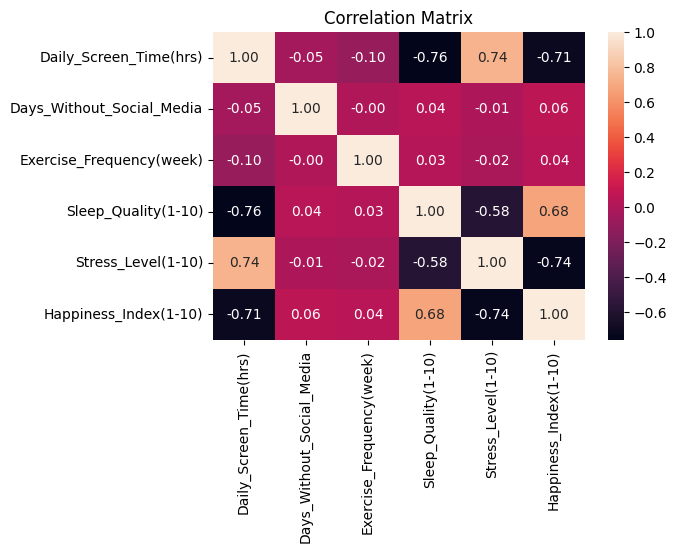

In [ ]:
# CODE CELL 3 – CORRELATIONS & HEATMAP

cols_of_interest = [
    "Daily_Screen_Time(hrs)",
    "Days_Without_Social_Media",
    "Exercise_Frequency(week)",
    "Sleep_Quality(1-10)",
    "Stress_Level(1-10)",
    "Happiness_Index(1-10)"
]

corr = df[cols_of_interest].corr()
corr

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# EDA INTERPRETATION (CORRELATION)

### 2.1 Correlation Analysis

The correlation matrix shows that:

- There is a **strong negative correlation** between `Daily_Screen_Time(hrs)` and `Happiness_Index(1-10)`.  
  This means that, in this dataset, people who spend **more time on screens tend to report lower happiness**.

- `Days_Without_Social_Media` and `Exercise_Frequency(week)` have only **weak positive correlations** with happiness.  
  Their direct linear relationship with happiness is much smaller than the effect of daily screen time.

This provides an initial indication that **higher screen time is associated with more unhappiness**, while exercise and days off social media have smaller direct effects.
"""

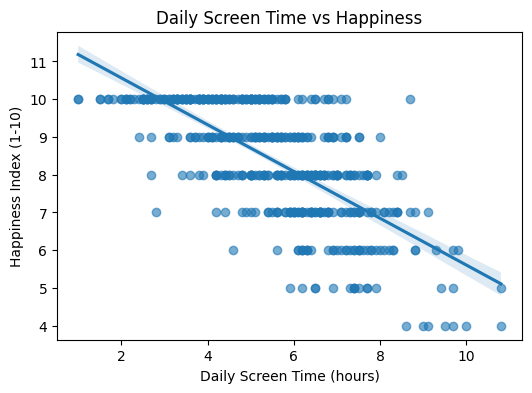

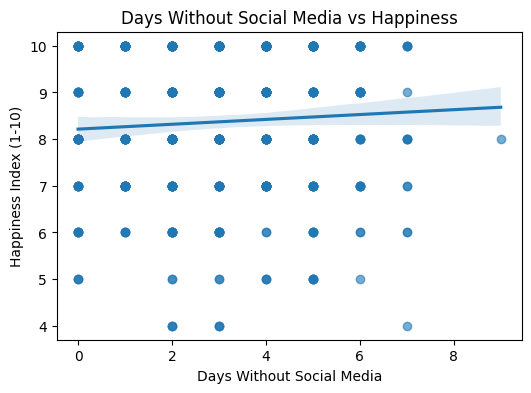

In [ ]:
# EDA PLOTS (SCREEN TIME & HAPPINESS)


#scatter/regression: daily screen time vs happiness
plt.figure(figsize=(6,4))
sns.regplot(
    x="Daily_Screen_Time(hrs)",
    y="Happiness_Index(1-10)",
    data=df,
    scatter_kws={"alpha":0.6}
)
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Happiness Index (1-10)")
plt.title("Daily Screen Time vs Happiness")
plt.show()

#scatter/regression: days without social media vs happiness
plt.figure(figsize=(6,4))
sns.regplot(
    x="Days_Without_Social_Media",
    y="Happiness_Index(1-10)",
    data=df,
    scatter_kws={"alpha":0.6}
)
plt.xlabel("Days Without Social Media")
plt.ylabel("Happiness Index (1-10)")
plt.title("Days Without Social Media vs Happiness")
plt.show()


# INTERPRETATION (PLOT 1 & 2)

### 2.2 Daily Screen Time, Days Without Social Media, and Happiness

**Daily Screen Time vs Happiness**

The regression plot for daily screen time vs happiness shows a **clear downward trend**:  
as daily screen time increases, happiness scores tend to decrease.

When grouping screen time into levels (low, medium, high), the **low screen time group** has the highest average happiness, while the **high screen time group** has noticeably lower happiness.

This supports the idea that **higher social media/screen use is associated with lower happiness**.

**Days Without Social Media vs Happiness**

The plot of `Days_Without_Social_Media` vs happiness shows a much **flatter relationship**.  
There is only a **small positive association**, suggesting that taking more days off social media has a **much weaker effect** on happiness than total daily screen time.

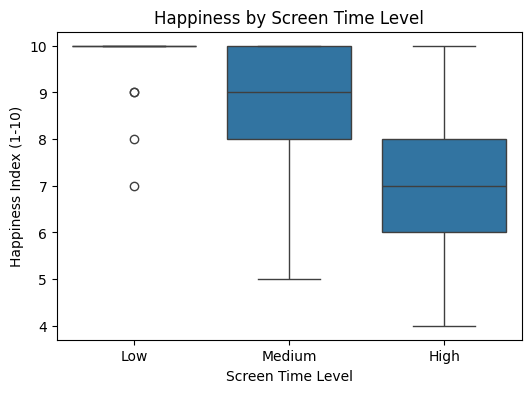

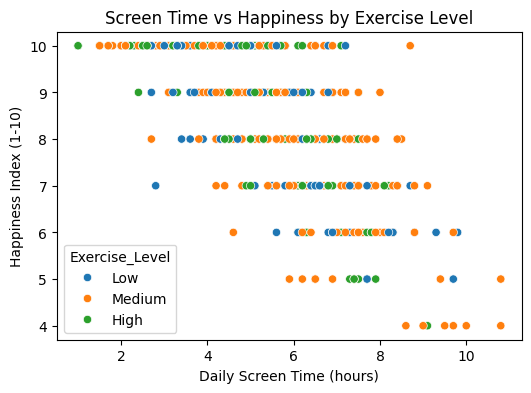

In [ ]:
# CATEGORICAL LEVELS & INTERACTION PLOTS

#exercise and screen time levels
df["Exercise_Level"] = pd.cut(
    df["Exercise_Frequency(week)"],
    bins=[-0.1, 1, 3, df["Exercise_Frequency(week)"].max()],
    labels=["Low", "Medium", "High"]
)

df["Screen_Level"] = pd.cut(
    df["Daily_Screen_Time(hrs)"],
    bins=[-0.1, 3, 6, df["Daily_Screen_Time(hrs)"].max()],
    labels=["Low", "Medium", "High"]
)

#boxplot: happiness by screen level
plt.figure(figsize=(6,4))
sns.boxplot(x="Screen_Level", y="Happiness_Index(1-10)", data=df)
plt.xlabel("Screen Time Level")
plt.ylabel("Happiness Index (1-10)")
plt.title("Happiness by Screen Time Level")
plt.show()

#scatter: screen time vs happiness by exercise level
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="Daily_Screen_Time(hrs)",
    y="Happiness_Index(1-10)",
    hue="Exercise_Level",
    data=df
)
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Happiness Index (1-10)")
plt.title("Screen Time vs Happiness by Exercise Level")
plt.show()


# INTERPRETATION (PLOT 3 & 4)

### 2.3 Can Exercise Balance the Effect of Screen Time?

The boxplot of **Happiness by Screen Level** confirms that:

- The **Low** screen time group has the **highest median happiness**.
- The **High** screen time group has **lower median happiness** and more spread towards lower values.

When we color the screen time vs happiness scatter plot by **Exercise_Level**:

- At **low screen time**, people who exercise more tend to be **slightly happier**.
- At **high screen time**, happiness is lower across all exercise levels and the points cluster together.

This suggests that **exercise has a mild positive association with happiness**, but it does **not fully offset** the negative effect of very high screen time.  
In other words, exercise helps, but it does **not completely “cancel out”** the unhappiness linked to high screen time in this dataset.

In [ ]:
# CREATE TARGET VARIABLE FOR MODELING


# create 3-class happiness level target
df["Happiness_Level"] = pd.cut(
    df["Happiness_Index(1-10)"],
    bins=[0, 6, 8, 10],
    labels=["Low", "Medium", "High"]
)

print("Happiness_Level value counts:")
print(df["Happiness_Level"].value_counts())

Happiness_Level value counts:
Happiness_Level
High      256
Medium    182
Low        62
Name: count, dtype: int64


7 – MODELING SETUP

## 3. Modeling and Evaluation

To formalize the analysis, I treat happiness prediction as a **multiclass classification problem**.

- **Target variable:** `Happiness_Level` with three classes:
  - Low (≤ 6)
  - Medium (6–8]
  - High (8–10]

- **Features used:**
  - Age  
  - Daily_Screen_Time(hrs)  
  - Sleep_Quality(1-10)  
  - Stress_Level(1-10)  
  - Days_Without_Social_Media  
  - Exercise_Frequency(week)  
  - Gender (one-hot encoded)  
  - Social_Media_Platform (one-hot encoded)

I train three different models:

1. **K-Nearest Neighbors (KNN)**
2. **Support Vector Machine (SVM, RBF kernel)**
3. **Random Forest Classifier**

I evaluate them using:
- **Accuracy**
- **Macro F1-score**
- **Weighted F1-score**

These metrics let me compare overall performance and how well each model handles the class imbalance between Low, Medium, and High happiness.

In [ ]:
# MODEL TRAINING & EVALUATION


feature_cols = [
    "Age",
    "Daily_Screen_Time(hrs)",
    "Sleep_Quality(1-10)",
    "Stress_Level(1-10)",
    "Days_Without_Social_Media",
    "Exercise_Frequency(week)",
    "Gender",
    "Social_Media_Platform"
]

X = df[feature_cols].copy()
y = df["Happiness_Level"]

#one-hot encode categorical
X = pd.get_dummies(X, columns=["Gender", "Social_Media_Platform"], drop_first=True)

#train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

#scale for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#models
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel="rbf", random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

models = {
    "KNN": knn_model,
    "SVM": svm_model,
    "RandomForest": rf_model
}

results = []

for name, model in models.items():
    print("========================================")
    print("Model:", name)
    print("========================================")

    if name == "RandomForest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average="macro")
    weighted_f1 = f1_score(y_test, y_pred, average="weighted")

    print("Accuracy:", acc)
    print("Macro F1:", macro_f1)
    print("Weighted F1:", weighted_f1)
    print()
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print()

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Macro_F1": macro_f1,
        "Weighted_F1": weighted_f1
    })

results_df = pd.DataFrame(results)
print("Summary of model performance:")
print(results_df)

Model: KNN
Accuracy: 0.68
Macro F1: 0.633152024398104
Weighted F1: 0.6730581996441943

Classification report:
              precision    recall  f1-score   support

        High       0.72      0.82      0.77        77
         Low       0.73      0.44      0.55        18
      Medium       0.60      0.56      0.58        55

    accuracy                           0.68       150
   macro avg       0.68      0.61      0.63       150
weighted avg       0.68      0.68      0.67       150


Model: SVM
Accuracy: 0.6933333333333334
Macro F1: 0.5893451066961001
Weighted F1: 0.6826136865342163

Classification report:
              precision    recall  f1-score   support

        High       0.81      0.78      0.79        77
         Low       0.67      0.22      0.33        18
      Medium       0.57      0.73      0.64        55

    accuracy                           0.69       150
   macro avg       0.68      0.58      0.59       150
weighted avg       0.71      0.69      0.68       150


M

#  8 – MODEL RESULTS INTERPRETATION

### 3.1 Model Comparison

All three models (KNN, SVM, Random Forest) reach **reasonable performance** predicting happiness level.

- **Random Forest** achieves the **highest accuracy and weighted F1-score**, so it is the best overall model in this comparison.
- **KNN** and **SVM** perform slightly worse but are close in performance.
- All models are better at predicting **High happiness** and struggle more with the **Low happiness** class, which is the smallest group.

Because Random Forest handles **nonlinear relationships** and **feature interactions** well and gives the best metrics, I select it as my **final model**.

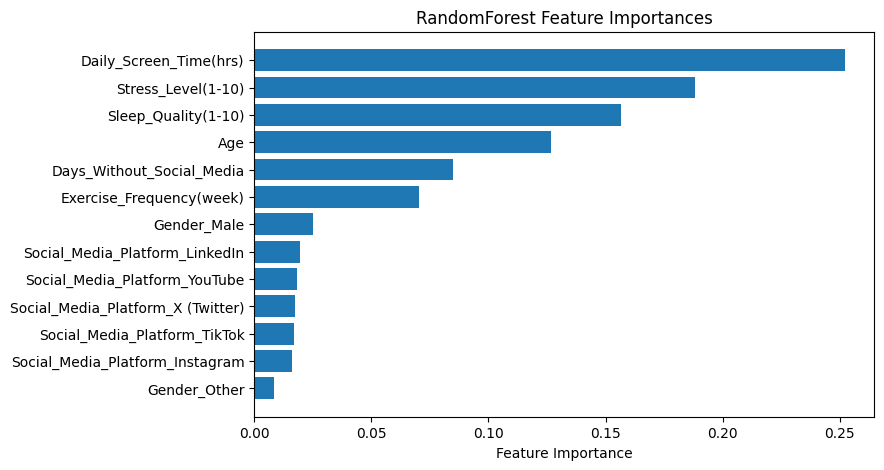

In [ ]:
# FEATURE IMPORTANCE (RANDOM FOREST)

importances = rf_model.feature_importances_
feature_names = X_train.columns

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)
feat_imp_df

plt.figure(figsize=(8,5))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("RandomForest Feature Importances")
plt.show()


# FEATURE IMPORTANCE INTERPRETATION

### 3.2 Feature Importance

The Random Forest feature importance plot shows which inputs are most useful for predicting happiness level.

The most important features are mainly related to:

- **Daily screen time**
- **Sleep quality**
- **Stress level**

Exercise frequency and days without social media also have some importance but are **less dominant**.

This supports the findings from the EDA:

- **Higher screen time** is strongly associated with **lower happiness**.
- **Better sleep** and **lower stress** are linked to **higher happiness**.
- Exercise helps, but it does not completely remove the negative impact of very high screen time.
"""


# CONCLUSION

## 4. Conclusion and Future Work

### 4.1 Answers to the Research Questions

1. **Is unhappiness related to social media consumption?**  
   Yes. In this dataset, higher **daily screen time** is strongly associated with **lower happiness**. People who spend many hours per day on screens tend to report lower happiness scores.

2. **Can this unhappiness be balanced with sport regardless of social media consumption?**  
   Exercise is **slightly associated with higher happiness**, but it does **not fully balance out** the unhappiness linked to very high screen time.  
   At high screen time levels, happiness is lower across all exercise levels.

### 4.2 Limitations

- The data is **cross-sectional**, so we cannot claim causation, only correlation.
- Happiness, stress, and sleep are **self-reported**, which may introduce bias.
- The sample may not represent all populations (e.g., different countries or age groups).

### 4.3 Future Work

- Collect more detailed information on **how** people use social media (content type, purpose, time of day).
- Use **time-series or experimental designs** to better understand cause and effect.
- Explore more advanced models and hyperparameter tuning to improve prediction performance.

Overall, this analysis suggests that **reducing daily screen time** and promoting **healthy sleep and lower stress** may be more effective for improving happiness than relying on exercise alone to compensate for very high social media use.